Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


Load data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MyDrive/MyDrive/Project_Data/supply_train.csv')
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [8]:
# Remove unwanted columns
df = df.drop(columns = ['Ware_house_ID', 'WH_Manager_ID'])
df.head()

KeyError: "['Ware_house_ID', 'WH_Manager_ID'] not found in axis"

In [9]:
# check duplicate and NULL
df.duplicated().sum()
df.isna().sum()

Unnamed: 0                         0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [10]:
# find approved_wh_govt_certificate colunm count and replace null with common value
df['approved_wh_govt_certificate'].value_counts()
df['approved_wh_govt_certificate'].fillna(value='C',inplace=True)


In [11]:
# update the null 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [13]:
# update the null 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [14]:
# update the null 'wh_est_year' with the mean
df['wh_est_year'].fillna(value =df['wh_est_year'].mean(),inplace=True)

In [15]:
# Check for missing values
df.isna().sum()

Unnamed: 0                      0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [17]:
# Identify inconsistencies in data for categorical values
cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for col in cols:
  values = df[col].value_counts()
  print(f'{col}:\n{values}')

Location_type:
Rural    15272
Urban     1348
Name: Location_type, dtype: int64
WH_capacity_size:
Large    6743
Mid      6691
Small    3186
Name: WH_capacity_size, dtype: int64
zone:
North    6800
West     5320
South    4223
East      277
Name: zone, dtype: int64
WH_regional_zone:
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: WH_regional_zone, dtype: int64
wh_owner_type:
Company Owned    8975
Rented           7645
Name: wh_owner_type, dtype: int64
approved_wh_govt_certificate:
C     4237
B+    3260
B     3220
A     3132
A+    2771
Name: approved_wh_govt_certificate, dtype: int64


Univariate visuals for the target and all features

Text(0.5, 1.0, 'Location Type : Rural or Urban')

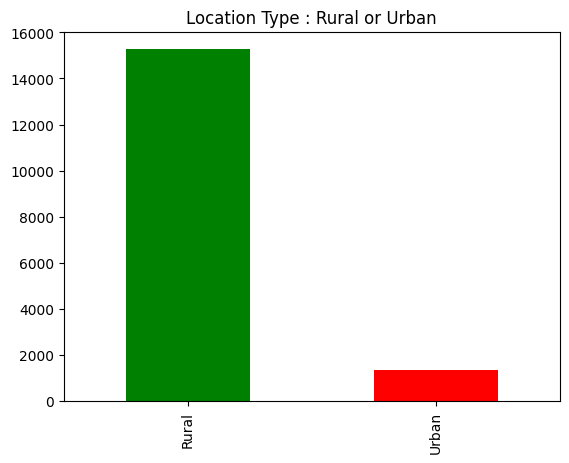

In [18]:

#l features  'Location_type'
Location_types = df['Location_type'].value_counts()
Location_types.plot(kind='bar',color=['green','Red'])
plt.title('Location Type : Rural or Urban')

Text(0.5, 1.0, 'WH_capacity_size : Large or Mid or Small')

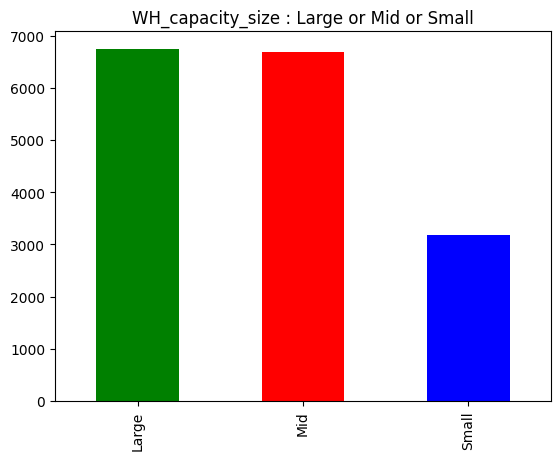

In [19]:
# features  'WH_capacity_size'
WH_capacity_size = df['WH_capacity_size'].value_counts()
WH_capacity_size.plot(kind='bar',color=['green','Red','blue'])
plt.title('WH_capacity_size : Large or Mid or Small')

Text(0.5, 1.0, 'Zone type')

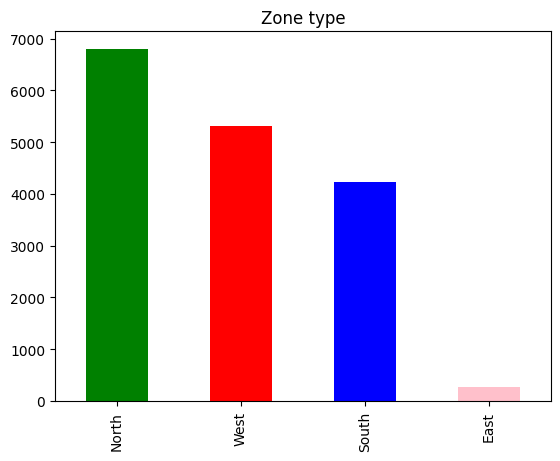

In [20]:
# Zone Feature
zone = df['zone'].value_counts()
zone.plot(kind='bar',color=['green','red','blue','pink'])
plt.title('Zone type')

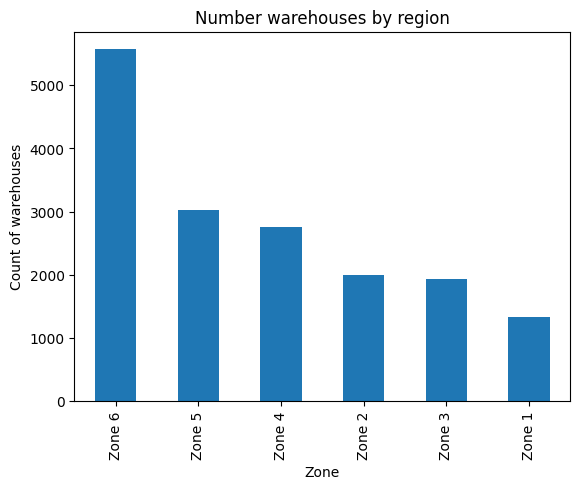

In [21]:
# WH_regional_zone feature
WH_counts = df['WH_regional_zone'].value_counts().sort_values(ascending=False)
WH_counts.plot(kind="bar")
plt.title('Number warehouses by region')
plt.ylabel('Count of warehouses')
plt.xlabel('Zone')
plt.show()

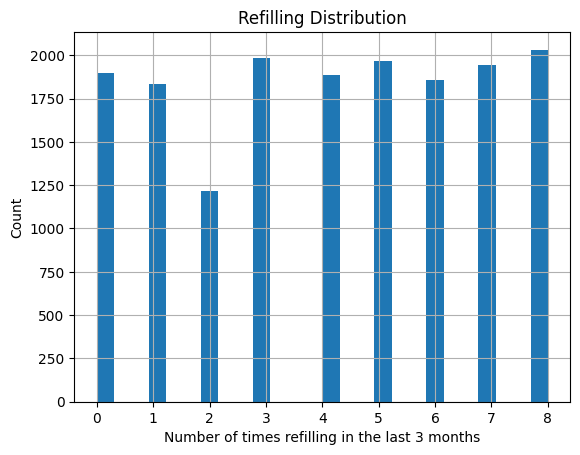

In [22]:
# num_refill_req_l3m feature
df['num_refill_req_l3m'].hist(bins='auto')
plt.xlabel('Number of times refilling in the last 3 months')
plt.ylabel('Count')
plt.title('Refilling Distribution')
plt.show()

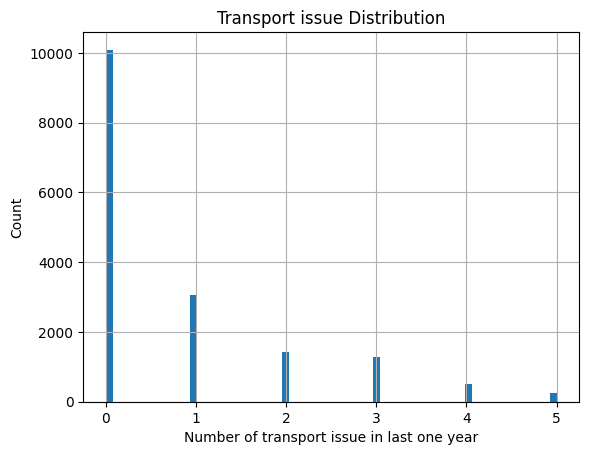

In [23]:
# transport_issue_l1y feature
df['transport_issue_l1y'].hist(bins='auto')
plt.xlabel('Number of transport issue in last one year')
plt.ylabel('Count')
plt.title('Transport issue Distribution')
plt.show()

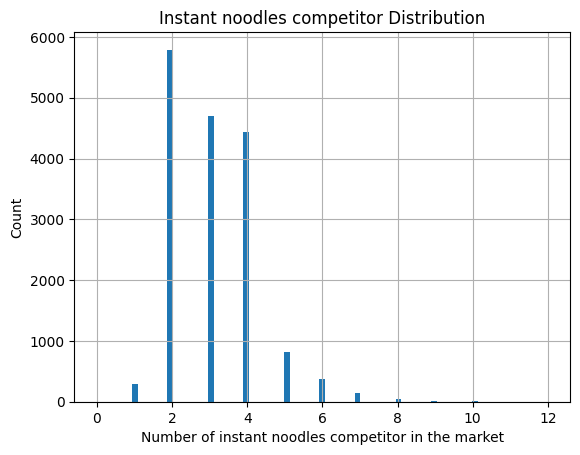

In [20]:
# Competitor_in_mkt feature
df['Competitor_in_mkt'].hist(bins='auto')
plt.xlabel('Number of instant noodles competitor in the market')
plt.ylabel('Count')
plt.title('Instant noodles competitor Distribution')
plt.show()

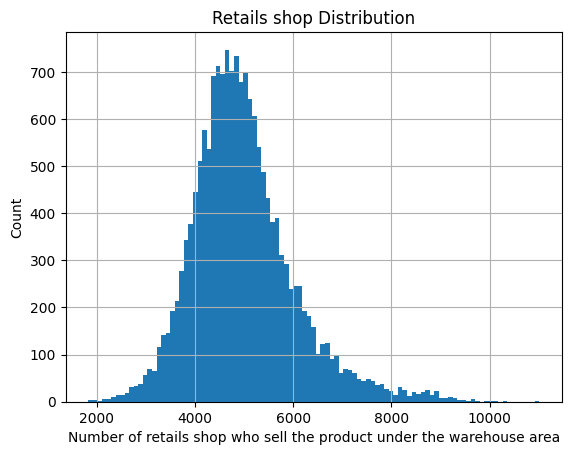

In [21]:
# retail_shop_num Feature
df['retail_shop_num'].hist(bins='auto')
plt.xlabel('Number of retails shop who sell the product under the warehouse area')
plt.ylabel('Count')
plt.title('Retails shop Distribution')
plt.show()

Text(0.5, 1.0, 'wh_owner_type : Owned or Rented')

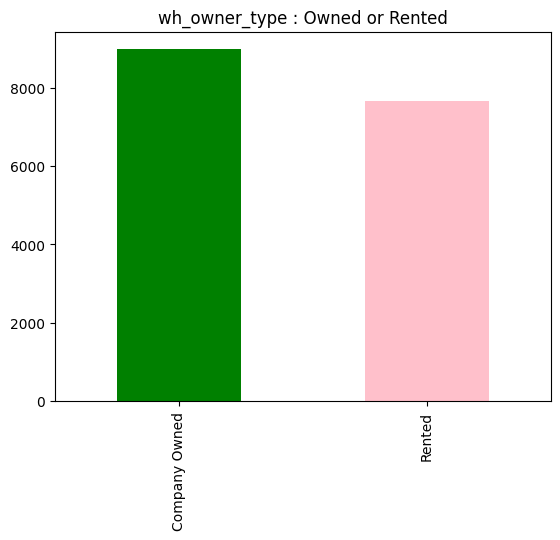

In [22]:
# wh_owner_type feature
wh_owner_type = df['wh_owner_type'].value_counts()
wh_owner_type.plot(kind='bar',color=['green','pink'])
plt.title('wh_owner_type : Owned or Rented')

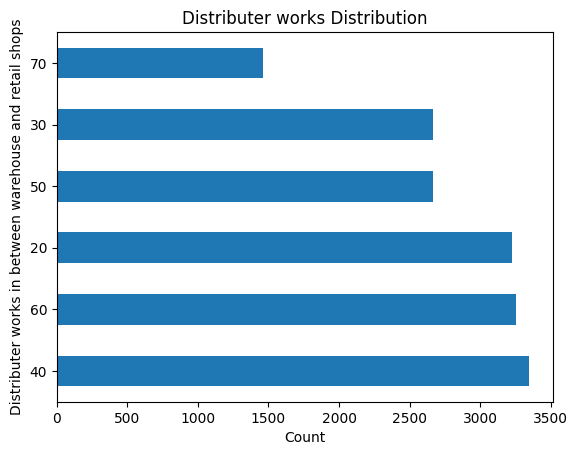

In [23]:
#  distributor_num feature
distributor = df['distributor_num'].round(-1).value_counts()
distributor.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Distributer works in between warehouse and retail shops')
plt.title('Distributer works Distribution')
plt.show()

Text(0.5, 1.0, 'flood_impacted: 0 or 1')

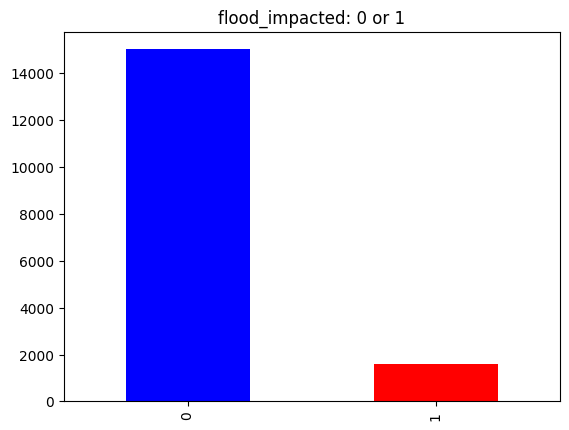

In [24]:
# flood_impacted feature
flood_impacted = df['flood_impacted'].value_counts()
flood_impacted.plot(kind='bar',color=['blue','red'])
plt.title('flood_impacted: 0 or 1')

Text(0.5, 1.0, 'flood_proof: 0 or 1')

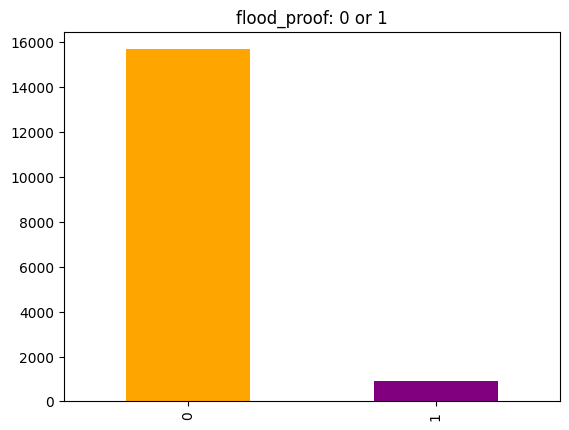

In [25]:
# flood_proof Feature
flood_proof = df['flood_proof'].value_counts()
flood_proof.plot(kind='bar',color=['orange','purple'])
plt.title('flood_proof: 0 or 1')

Text(0.5, 1.0, 'electric_supply: 0 or 1')

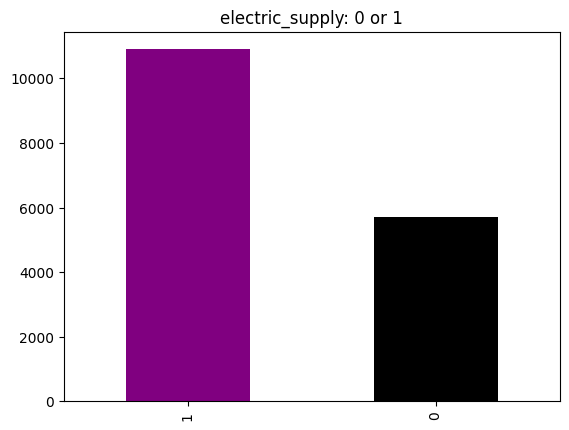

In [26]:
# electric_supply Feature
electric_supply = df['electric_supply'].value_counts()
electric_supply.plot(kind='bar',color=['purple','black'])
plt.title('electric_supply: 0 or 1')

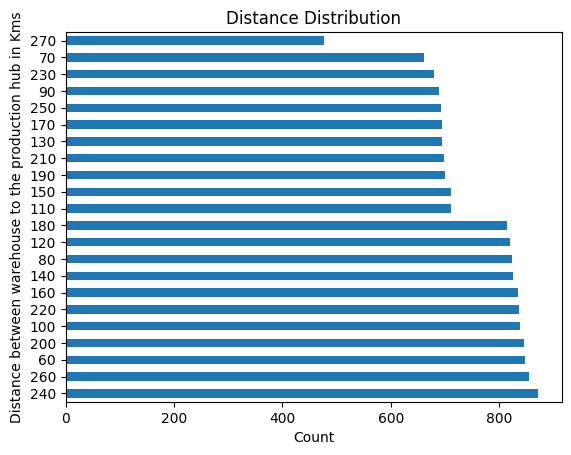

In [27]:
# dist_from_hub feature
distributor= df['dist_from_hub'].round(-1).value_counts()
distributor.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Distance between warehouse to the production hub in Kms')
plt.title('Distance Distribution')
plt.show()


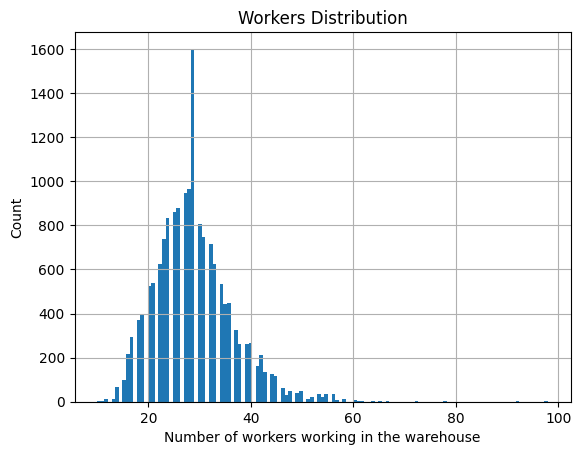

In [28]:
#  workers_num feature
df['workers_num'].hist(bins='auto')
plt.xlabel('Number of workers working in the warehouse')
plt.ylabel('Count')
plt.title('Workers Distribution')
plt.show()

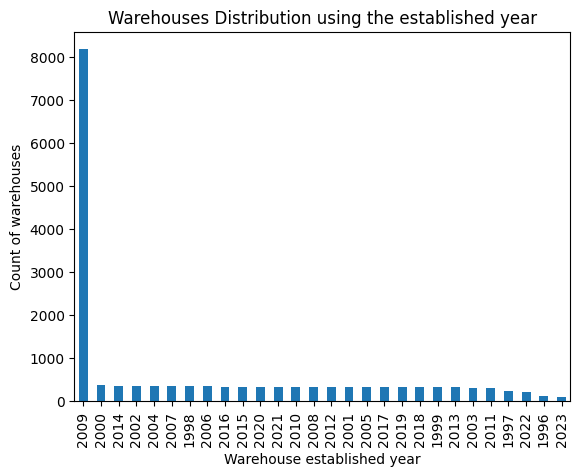

In [29]:
# wh_est_year Feature
df['wh_est_year'] = df['wh_est_year'].astype(int)
WHY_counts = df['wh_est_year'].value_counts().sort_values(ascending=False)
WHY_counts.plot(kind="bar")
plt.title('Warehouses Distribution using the established year')
plt.ylabel('Count of warehouses')
plt.xlabel('Warehouse established year')
plt.show()

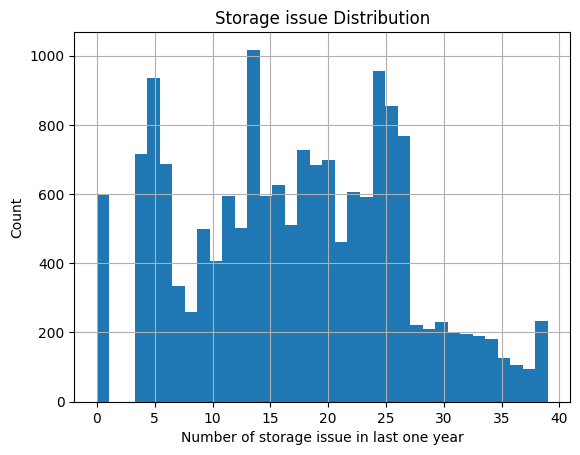

In [30]:
#
df['storage_issue_reported_l3m'].hist(bins='auto')
plt.xlabel('Number of storage issue in last one year')
plt.ylabel('Count')
plt.title('Storage issue Distribution')
plt.show()

Text(0.5, 1.0, 'temp_reg_mach: 0 or 1')

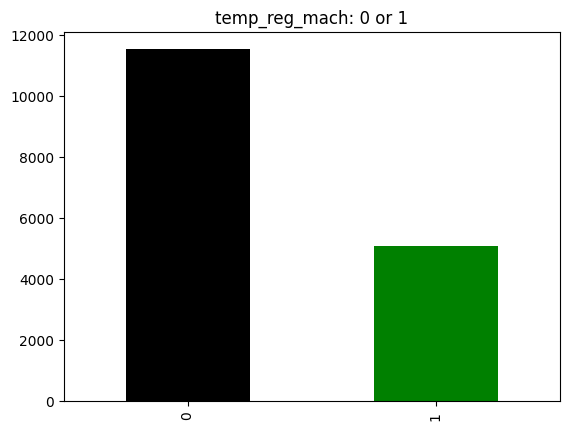

In [31]:
# temp_reg_mach
temp_reg_mach = df['temp_reg_mach'].value_counts()
temp_reg_mach.plot(kind='bar',color=['black', 'green'])
plt.title('temp_reg_mach: 0 or 1')

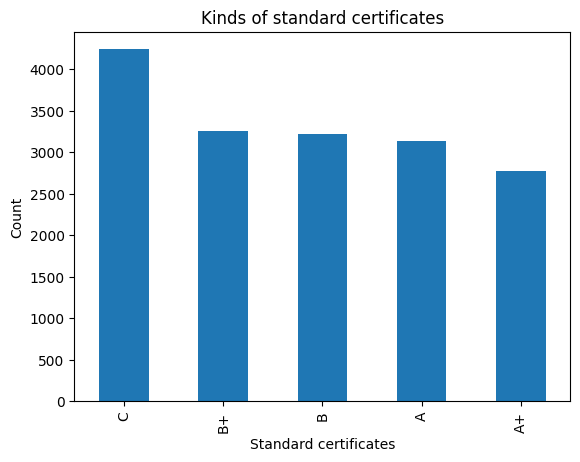

In [33]:
# approved_wh_govt_certificate
WH_Cf_counts = df['approved_wh_govt_certificate'].value_counts().sort_values(ascending=False)
WH_Cf_counts.plot(kind="bar")
plt.title('Kinds of standard certificates')
plt.ylabel('Count')
plt.xlabel('Standard certificates')
plt.show()

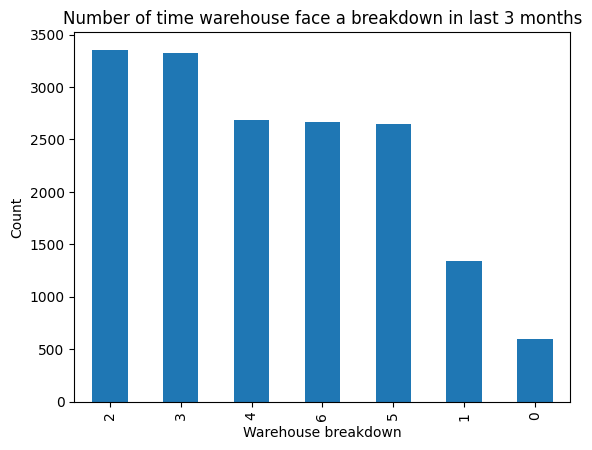

In [34]:
# wh_breakdown_l3m
WH_bk_counts = df['wh_breakdown_l3m'].value_counts().sort_values(ascending=False)
WH_bk_counts.plot(kind="bar")
plt.title('Number of time warehouse face a breakdown in last 3 months')
plt.ylabel('Count')
plt.xlabel('Warehouse breakdown')
plt.show()

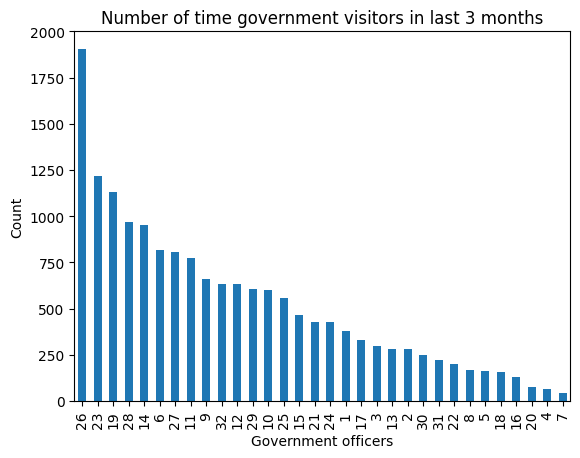

In [35]:
govt_counts = df['govt_check_l3m'].value_counts().sort_values(ascending=False)
govt_counts.plot(kind="bar")
plt.title('Number of time government visitors in last 3 months')
plt.ylabel('Count')
plt.xlabel('Government officers')
plt.show()

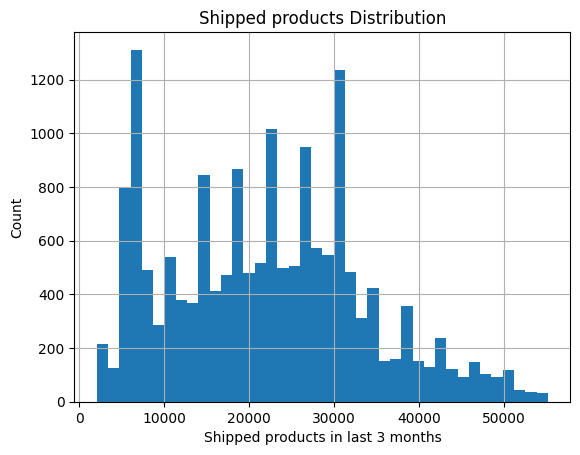

In [36]:
# product_wg_ton feature
df['product_wg_ton'].hist(bins='auto')
plt.xlabel('Shipped products in last 3 months')
plt.ylabel('Count')
plt.title('Shipped products Distribution')
plt.show()